#COGNIZANT PROJECT 

---



---



---





# TASK 1 ⚛

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!pip install pandas 
!pip install seaborn
!pip install numpy
!pip install matplotlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# EXPLORATORY DATA ANALYSIS 

---



---

- IMPORTING DATASET 

In [13]:
# File path in your Google Drive
file_path = '/content/drive/MyDrive/sample_sales_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

#Drop column unamed 
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

# Display the first few rows of the DataFrame
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


- checking for missing values 

In [14]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Display the count of null values for each column
print(null_values)


transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64


- Descriptive Statistics

In [15]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


## DATA VISUALISATION 

---



---

**In this section we would be visualizing the dataset using divers plot so as to gain better insight **


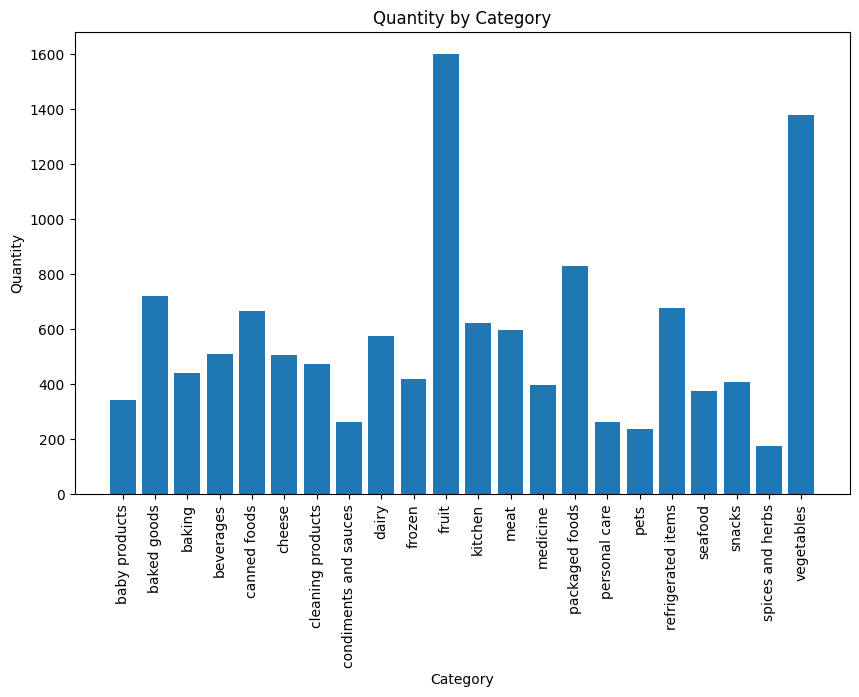

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your own dataset
df = pd.read_csv('/content/drive/MyDrive/sample_sales_data.csv')

# Sample a subset of your dataset
sample_df = df.sample(n=5000)  # Adjust the number of rows to your preference

# Group the data by category and calculate the sum of quantity
grouped_df = sample_df.groupby('category')['quantity'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['category'], grouped_df['quantity'])
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Quantity by Category')
plt.xticks(rotation=90)
plt.show()


In [27]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')

In [36]:
import pandas as pd
import altair as alt

# Load your own dataset
df = pd.read_csv('/content/drive/MyDrive/sample_sales_data.csv')

# Group the data by category and calculate the count or total amount payable
df_category = df.groupby('category').agg({'transaction_id': 'count', 'total': 'sum'}).reset_index()

# Plot the bar chart
alt.Chart(df_category).mark_bar().encode(
    x='category:N',
    y='transaction_id:Q',  # Change to 'total:Q' for total amount payable
).properties(
    width=1000,
    height=400
)


alt.Chart(...)

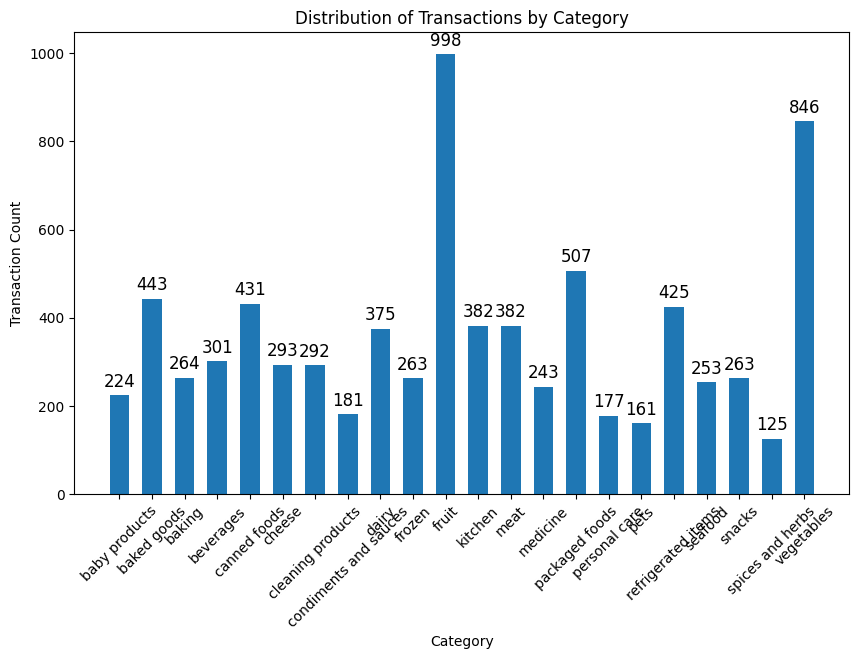

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your own dataset
df = pd.read_csv('/content/drive/MyDrive/sample_sales_data.csv')

# Group the data by category and calculate the count or total amount payable
df_category = df.groupby('category').agg({'transaction_id': 'count', 'total': 'sum'}).reset_index()

# Set the figure size and width of bars
plt.figure(figsize=(10, 6))
bar_width = 0.6

# Create the bar plot
plt.bar(df_category['category'], df_category['transaction_id'], width=bar_width)
plt.xlabel('Category')
plt.ylabel('Transaction Count')  # Change to 'Total Amount Payable' if using 'total' column
plt.title('Distribution of Transactions by Category')

# Add number labels on the bars
for i, count in enumerate(df_category['transaction_id']):
    plt.text(i, count + 20, str(count), ha='center', fontsize=12)

# Adjust the x-axis tick labels rotation if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [37]:
import pandas as pd
import altair as alt

# Load your own dataset
df = pd.read_csv('/content/drive/MyDrive/sample_sales_data.csv')

# Calculate the count of transactions by customer type
df_customer_type = df['customer_type'].value_counts().reset_index()

# Rename the columns
df_customer_type.columns = ['customer_type', 'transaction_count']

# Calculate the percentage of transactions
df_customer_type['percentage'] = (df_customer_type['transaction_count'] / df_customer_type['transaction_count'].sum()) * 100

# Plot the bar chart with percentage values
chart = alt.Chart(df_customer_type).mark_bar().encode(
    x='customer_type:N',
    y='transaction_count:Q',
    tooltip=['customer_type', 'transaction_count', 'percentage']
).properties(
    width=1000,
    height=400
)

text = chart.mark_text(
    align='center',
    baseline='middle',
    dy=-5,
    fontSize=13,
    color='black'
).encode(
    text=alt.Text('percentage:Q', format='.1f')
)

(chart + text).configure_axisX(
    labelAngle=0
)


alt.LayerChart(...)

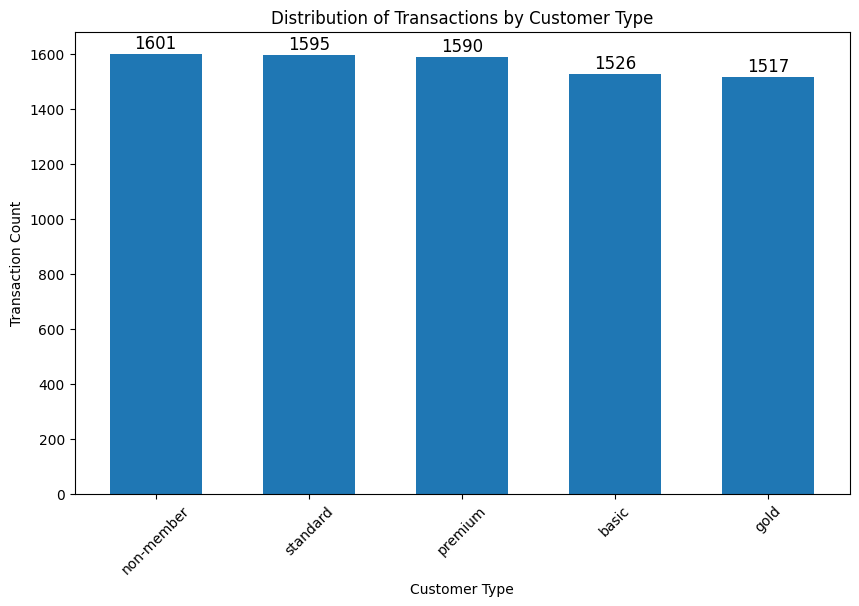

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your own dataset
df = pd.read_csv('/content/drive/MyDrive/sample_sales_data.csv')

# Calculate the count of transactions by customer type
df_customer_type = df['customer_type'].value_counts().reset_index()

# Rename the columns
df_customer_type.columns = ['customer_type', 'transaction_count']

# Set the figure size and width of bars
plt.figure(figsize=(10, 6))
bar_width = 0.6

# Create the bar plot with number labels
plt.bar(df_customer_type['customer_type'], df_customer_type['transaction_count'], width=bar_width)
plt.xlabel('Customer Type')
plt.ylabel('Transaction Count')
plt.title('Distribution of Transactions by Customer Type')

# Add number labels on the bars
for i, count in enumerate(df_customer_type['transaction_count']):
    plt.text(i, count + 20, str(count), ha='center', fontsize=12)

# Adjust the x-axis tick labels rotation if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


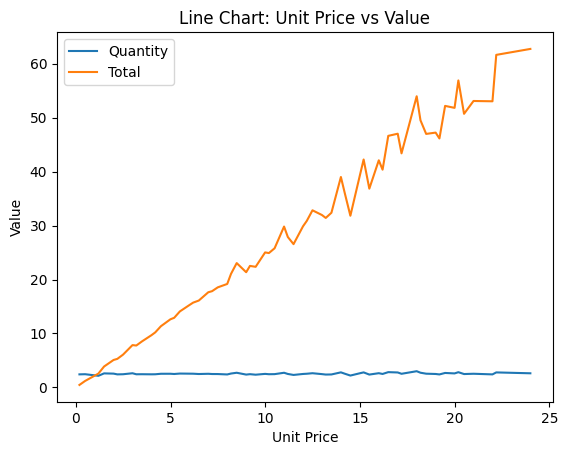

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your own dataset
df = pd.read_csv('/content/drive/MyDrive/sample_sales_data.csv')

# Group the data by unit_price and calculate the average quantity and total
grouped_df = df.groupby('unit_price').agg({'quantity': 'mean', 'total': 'mean'}).reset_index()

# Sorting the data by unit_price
grouped_df = grouped_df.sort_values('unit_price')

# Plotting the line chart
plt.plot(grouped_df['unit_price'], grouped_df['quantity'], label='Quantity')
plt.plot(grouped_df['unit_price'], grouped_df['total'], label='Total')
plt.xlabel('Unit Price')
plt.ylabel('Value')
plt.title('Line Chart: Unit Price vs Value')
plt.legend()

plt.show()


In [49]:
import pandas as pd
import altair as alt

# Load your own dataset
df = pd.read_csv('/content/drive/MyDrive/sample_sales_data.csv')

# Group the data by payment type and calculate the count of transactions
grouped_df = df.groupby('payment_type')['transaction_id'].count().reset_index()

# Create the stacked bar chart
chart = alt.Chart(grouped_df).mark_bar().encode(
    x=alt.X('payment_type:N', title='Payment Type'),
    y=alt.Y('transaction_id:Q', title='Count of Transactions'),
    color=alt.Color('payment_type:N', legend=None)
).properties(
    width=1000,
    height=500
)

chart


alt.Chart(...)

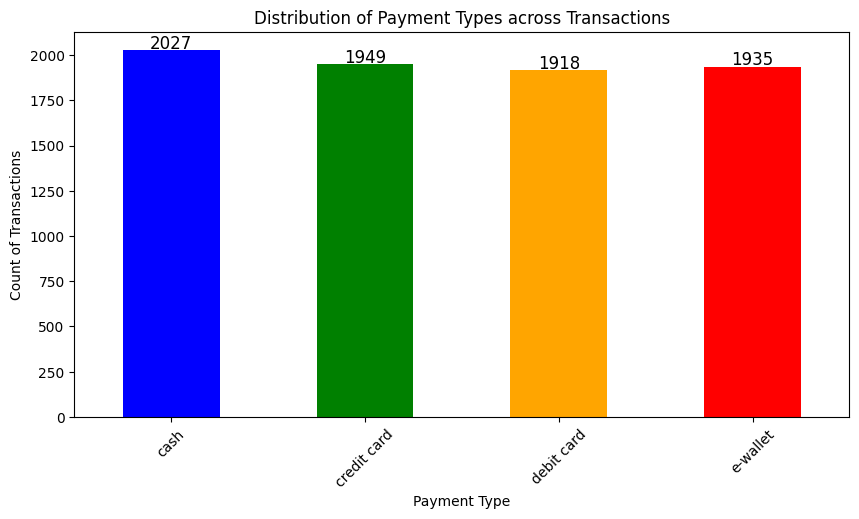

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your own dataset
df = pd.read_csv('/content/drive/MyDrive/sample_sales_data.csv')

# Group the data by payment type and calculate the count of transactions
grouped_df = df.groupby('payment_type')['transaction_id'].count()

# Define a colormap
colors = ['blue', 'green', 'orange', 'red']

# Create the bar plot with different colors
plt.figure(figsize=(10, 5))
ax = grouped_df.plot(kind='bar', color=colors)
plt.xlabel('Payment Type')
plt.ylabel('Count of Transactions')
plt.title('Distribution of Payment Types across Transactions')
plt.xticks(rotation=45)

# Add number labels on the bars
for i, count in enumerate(grouped_df):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12)

plt.show()


In [58]:
df.shape


(7829, 10)

⚛ HERE IS THE EMAIL SENT TO THE GALA TEAM LEADER BASED ON THE FINDINGS MADE FROM THE EXPLORATORY DATA ANALYSIS MADE 

Subject: Analysis Summary and Additional Data Requirements for Gala Groceries Project
 
 DearData Science Team Leader, I hope this email finds you well. 
 I have completed the initial analysis of the dataset provided by Gala Groceries, focusing on the stock management and supply chain issue. Based on the available data, I have generated several visualizations and gained valuable insights. Here is a summary of my findings:
 -  Category Distribution: The "Category per Transaction" plot reveals that the best-selling categories are fruits and vegetables, while spices and pets have the lowest sales.
 -  Customer Type Analysis: The "Customer Type per Transaction" plot indicates that non- members and standard customers have a higher number of transactions compared to other customer types.
 -  Unit Price and Total Amount Analysis: The line chart depicting the relationship between unit price and total amount suggests that the value of quantity remains constant, while the total amount increases. 
 - Payment Type Analysis: The visualization of "Payment Type per Transaction" shows that cash is the most frequently used payment method.

  Overall, these visualizations provide insights into the sales trends and customer behavior, highlighting the importance of optimizing the stock management strategy.

   Furthermore, I would like to mention that the dataset provided has a shape of (7829, 10), indicating that it consists of 7829 rows and 10 columns. 
   
   To further analyze and address the stock management issue effectively, I recommend obtaining additional data, including: 

   - Supplier Data: Information about suppliers, including availability, lead times, and reliability. 

   - Inventory Data: Stock levels, replenishment rates, and historical sales data to analyze stock movements. 

   - Demand Forecasting: Insights into customer demand patterns, seasonality, and trends to optimize stock levels.
   
   -  Operational Constraints: Information about storage capacity, shelf life of perishable products, and handling constraints. 

   - Market Trends and Competition Analysis: Understanding customer preferences, market dynamics, and competitor strategies to identify potential areas for improvement. 

 By incorporating this additional data, we can enhance our analysis and provide specific recommendations to address Gala Groceries' stock management challenges effectively.
   
  I appreciate your guidance in obtaining the necessary data and your support in further refining the analysis. 
 Once we have gathered the required information, I will provide a detailed report outlining our findings and recommendations. 
 Thank you for your attention to this matter. 
 I look forward to your feedback and further collaboration on this project. 
 
Best regards, 

Judith Boluwatito TOBOGBE 

Junior Data Scientist

**The analysis and visualization for Task 1 of the project, including data exploration, cleaning, and the creation of visualizations, were performed using Python on Google Colab**

---



---

